# Pre-processing Data Kapal Titanic Untuk Pembuatan Model Lebih Lanjut

### Data Collecting

In [ ]:
import pandas as pd

In [ ]:
df_train = pd.read_csv('/train.csv')
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### Data Understanding

In [ ]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Data Cleaning

In [ ]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
df_train.drop(['Cabin'], axis = 1, inplace = True)

In [ ]:
df_train['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [ ]:
df_train['Embarked'].fillna('S', inplace = True)

In [ ]:
df_train = df_train.drop(['PassengerId', 'Name', 'Ticket'], axis=1)

In [ ]:
sex = {"Sex": {"male":0, "female":1}}
df_train.replace(sex, inplace = True)

In [ ]:
df_train.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7,S
1,1,1,1,38.0,1,0,71,C
2,1,3,1,26.0,0,0,7,S
3,1,1,1,35.0,1,0,53,S
4,0,3,0,35.0,0,0,8,S
5,0,3,0,NaN,0,0,8,Q
6,0,1,0,54.0,0,0,51,S
7,0,3,0,2.0,3,1,21,S
8,1,3,1,27.0,0,2,11,S
9,1,2,1,14.0,1,0,30,C


In [ ]:
pria = df_train['Age'].loc[df_train['Sex'] == 0].mean()
wanita = df_train['Age'].loc[df_train['Sex'] == 1].mean()
print("Pria = ", pria, "Wanita = ", wanita)

Pria =  30.72664459161148 Wanita =  27.915708812260537


In [ ]:
df_train['Age'].loc[ (df_train['Sex'] == 0) & (df_train['Age'].isnull() == True) ] = 31

<ipython-input-12-54516598d1f5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['Age'].loc[ (df_train['Sex'] == 0) & (df_train['Age'].isnull() == True) ] = 31


In [ ]:
df_train['Age'].loc[ (df_train['Sex'] == 1) & (df_train['Age'].isnull() == True) ] = 28

<ipython-input-13-608b6bed2ee9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['Age'].loc[ (df_train['Sex'] == 1) & (df_train['Age'].isnull() == True) ] = 28


In [ ]:
df_train['Fare'] = df_train['Fare'].astype(int)
df_train['Age'] = df_train['Age'].astype(int)

<Axes: >

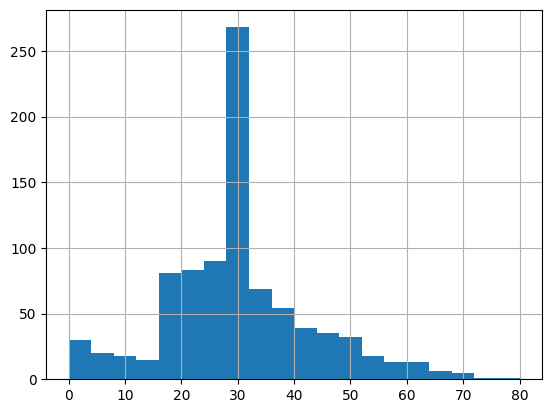

In [ ]:
df_train['Age'].hist(bins=20)

<Axes: >

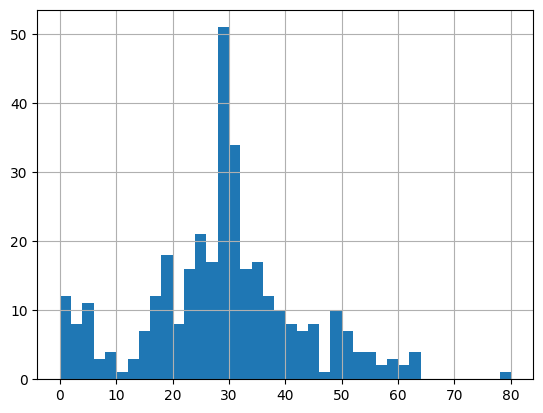

In [ ]:
df_train['Age'].loc[df_train['Survived'] == 1].hist(bins=40)

### Transformasi Data

In [ ]:
umur = [0, 5, 15, 25, 30, 35, 45, 50, 100]
umur_label = ['0-5', '5-15', '15-25', '25-30', '30-35', '35-45', '45-50', '>50']
kelompok_umur = pd.cut(df_train['Age'], umur, labels=umur_label)
df_train['KelompokUmur'] = kelompok_umur
df_train['KelompokUmurKode'] = df_train['KelompokUmur'].cat.codes
df_train['KelompokUmur'].value_counts()

KelompokUmur
15-25    218
30-35    210
25-30    163
35-45    116
>50       64
5-15      39
0-5       37
45-50     37
Name: count, dtype: int64

<Axes: >

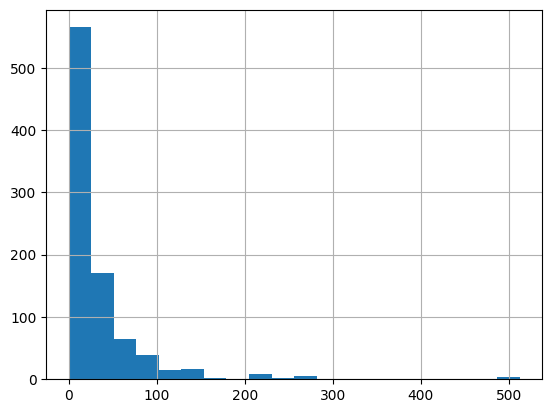

In [ ]:
df_train['Fare'].hist(bins=20)

In [ ]:
harga = [0, 10, 30, 35, 80, 500]
harga_label = ['0-10', '10-30', '30-35', '35-80', '>80']
kelompok_harga = pd.cut(df_train['Fare'], harga, labels=harga_label)
df_train['KelompokHarga'] = kelompok_harga
df_train['KelompokHargaKode'] = df_train['KelompokHarga'].cat.codes

In [ ]:
JumlahOrang = df_train['SibSp'].astype(int) + df_train['Parch'].astype(int) + 1
df_train['JumlahOrang'] = JumlahOrang.astype(int)

In [ ]:
df_train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,KelompokUmur,KelompokUmurKode,KelompokHarga,KelompokHargaKode,JumlahOrang
0,0,3,0,22,1,0,7,S,15-25,2,0-10,0,2
1,1,1,1,38,1,0,71,C,35-45,5,35-80,3,2
2,1,3,1,26,0,0,7,S,25-30,3,0-10,0,1
3,1,1,1,35,1,0,53,S,30-35,4,35-80,3,2
4,0,3,0,35,0,0,8,S,30-35,4,0-10,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,27,0,0,13,S,25-30,3,10-30,1,1
887,1,1,1,19,0,0,30,S,15-25,2,10-30,1,1
888,0,3,1,28,1,2,23,S,25-30,3,10-30,1,4
889,1,1,0,26,0,0,30,C,25-30,3,10-30,1,1


In [ ]:
df_train.loc[df_train['Survived'] == 1]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,KelompokUmur,KelompokUmurKode,KelompokHarga,KelompokHargaKode,JumlahOrang
1,1,1,1,38,1,0,71,C,35-45,5,35-80,3,2
2,1,3,1,26,0,0,7,S,25-30,3,0-10,0,1
3,1,1,1,35,1,0,53,S,30-35,4,35-80,3,2
8,1,3,1,27,0,2,11,S,25-30,3,10-30,1,3
9,1,2,1,14,1,0,30,C,5-15,1,10-30,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
875,1,3,1,15,0,0,7,C,5-15,1,0-10,0,1
879,1,1,1,56,0,1,83,C,>50,7,>80,4,2
880,1,2,1,25,0,1,26,S,15-25,2,10-30,1,2
887,1,1,1,19,0,0,30,S,15-25,2,10-30,1,1


<Axes: >

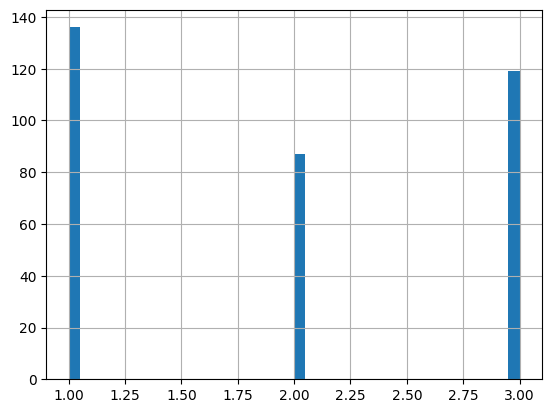

In [ ]:
df_train['Pclass'].loc[df_train['Survived'] == 1].hist(bins=40)

<Axes: >

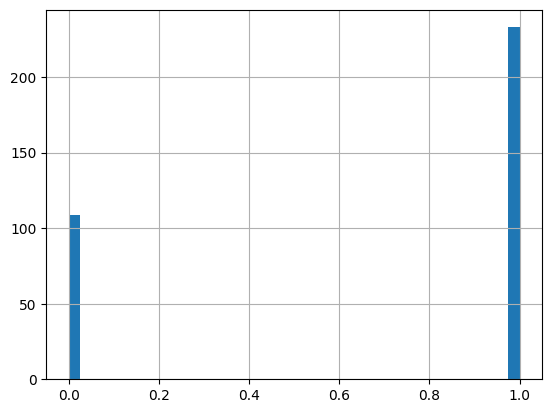

In [ ]:
df_train['Sex'].loc[df_train['Survived'] == 1].hist(bins=40)

<Axes: >

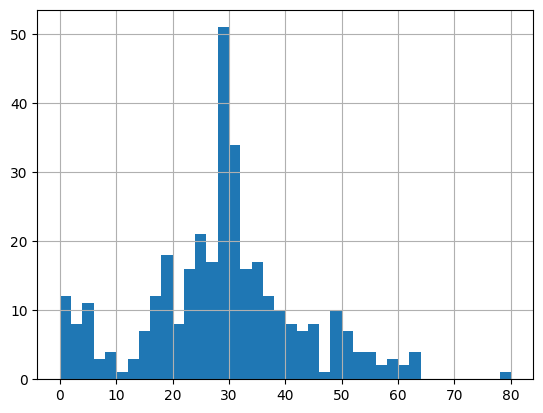

In [ ]:
df_train['Age'].loc[df_train['Survived'] == 1].hist(bins=40)

<Axes: >

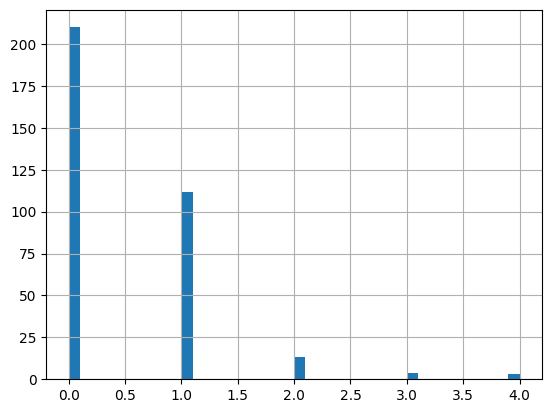

In [ ]:
df_train['SibSp'].loc[df_train['Survived'] == 1].hist(bins=40)

<Axes: >

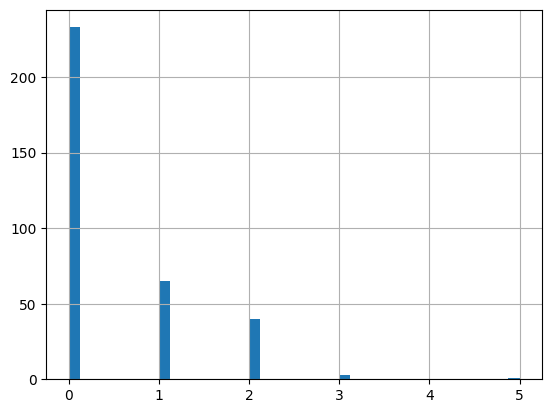

In [ ]:
df_train['Parch'].loc[df_train['Survived'] == 1].hist(bins=40)

<Axes: >

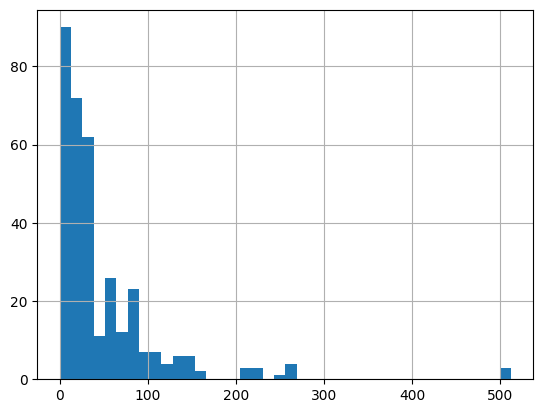

In [ ]:
df_train['Fare'].loc[df_train['Survived'] == 1].hist(bins=40)

<Axes: >

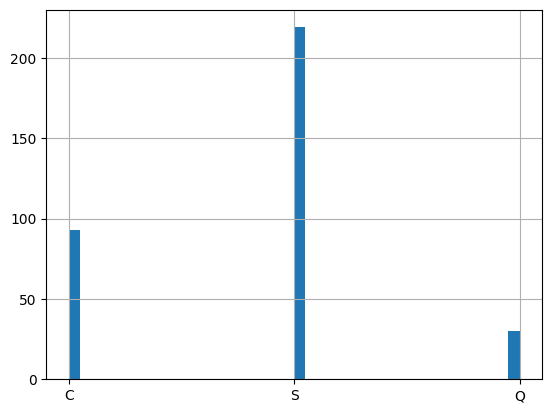

In [ ]:
df_train['Embarked'].loc[df_train['Survived'] == 1].hist(bins=40)

<Axes: >

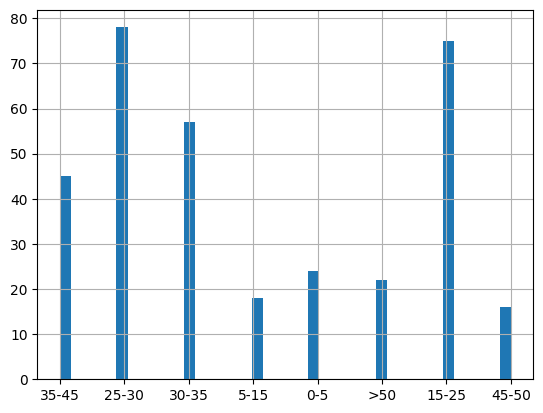

In [ ]:
df_train['KelompokUmur'].loc[df_train['Survived'] == 1].hist(bins=40)

<Axes: >

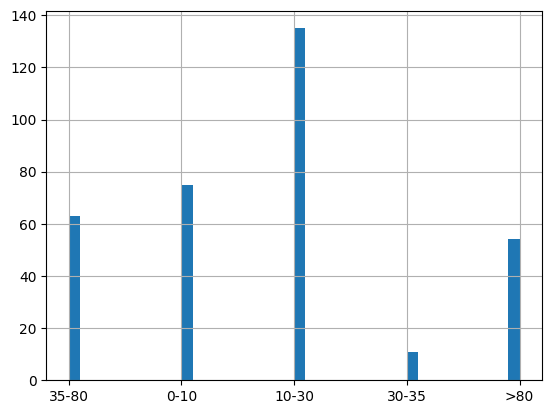

In [ ]:
df_train['KelompokHarga'].loc[df_train['Survived'] == 1].hist(bins=40)

<Axes: >

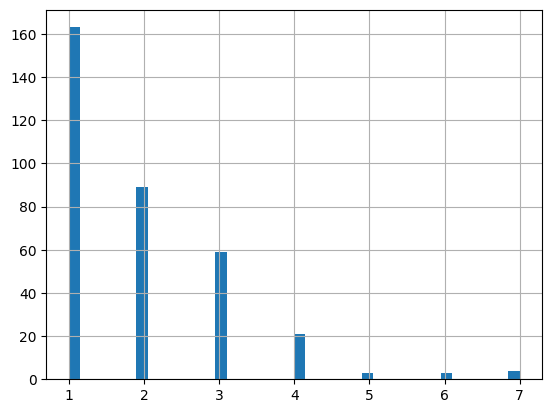

In [ ]:
df_train['JumlahOrang'].loc[df_train['Survived'] == 1].hist(bins=40)